<a href="https://colab.research.google.com/github/gracepane/tugas-python/blob/main/tugas11grace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

In [42]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [43]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [44]:
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((240, 240))) / 255.0 #normalisasi
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [45]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [46]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [48]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [49]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(444, 240, 240, 3)
(148, 240, 240, 3)


In [51]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(240,240,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 238, 238, 8)       224       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 119, 119, 8)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 117, 117, 16)      1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 58, 58, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)            

In [53]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(240*240*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [54]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 172800)            0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               17280100  
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 17,282,039
Trainable params: 17,282,039
Non-trainable params: 0
_________________________________________________________________


In [55]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [56]:
H = model1.fit(trainX, trainY, validation_data=(testX,testY), epochs=25,batch_size=32)

Epoch 1/25
14/14 [==============================] - 13s 921ms/step - loss: 1.6528 - accuracy: 0.2545 - val_loss: 1.5227 - val_accuracy: 0.3446
Epoch 2/25
14/14 [==============================] - 13s 921ms/step - loss: 1.4393 - accuracy: 0.3851 - val_loss: 1.3694 - val_accuracy: 0.3649
Epoch 3/25
14/14 [==============================] - 13s 914ms/step - loss: 1.2130 - accuracy: 0.5068 - val_loss: 1.1167 - val_accuracy: 0.5405
Epoch 4/25
14/14 [==============================] - 13s 919ms/step - loss: 1.0174 - accuracy: 0.6284 - val_loss: 0.9013 - val_accuracy: 0.6892
Epoch 5/25
14/14 [==============================] - 13s 918ms/step - loss: 0.7642 - accuracy: 0.7185 - val_loss: 0.8776 - val_accuracy: 0.6757
Epoch 6/25
14/14 [==============================] - 13s 917ms/step - loss: 0.6277 - accuracy: 0.7883 - val_loss: 0.7645 - val_accuracy: 0.7095
Epoch 7/25
14/14 [==============================] - 13s 925ms/step - loss: 0.5156 - accuracy: 0.8176 - val_loss: 0.7796 - val_accuracy: 0.7703

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


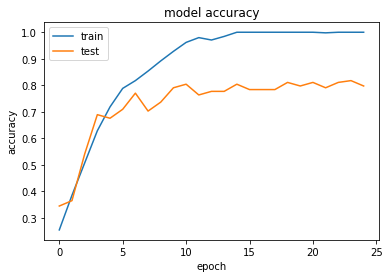

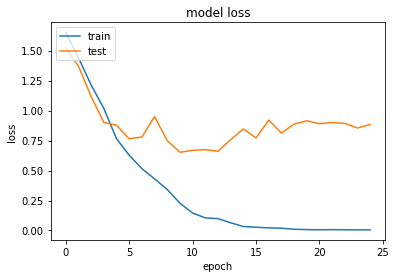

In [57]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [58]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.70      0.95      0.81        20
      GMB_03       0.85      0.97      0.90        29
      GMB_04       0.84      0.74      0.79        35
      GMB_05       0.86      0.75      0.80        32
      GMB_06       0.72      0.66      0.69        32

    accuracy                           0.80       148
   macro avg       0.79      0.81      0.80       148
weighted avg       0.80      0.80      0.79       148



In [59]:
model.save('nnmodel_daun')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_daun/assets
